In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv('CASchools.csv')

In [13]:
df.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024


In [14]:
df["score"] = (df["read"] + df["math"]) / 2 

df['stratio'] = df['students'] / df['teachers']

In [15]:
x = np.array(df["stratio"]).reshape(-1,1)
y = np.array(df["score"]).reshape(-1,1)

In [16]:
reg  = LinearRegression().fit(x,y)

In [17]:
reg.intercept_

array([698.93294928])

In [18]:
reg.coef_

array([[-2.27980814]])

In [19]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

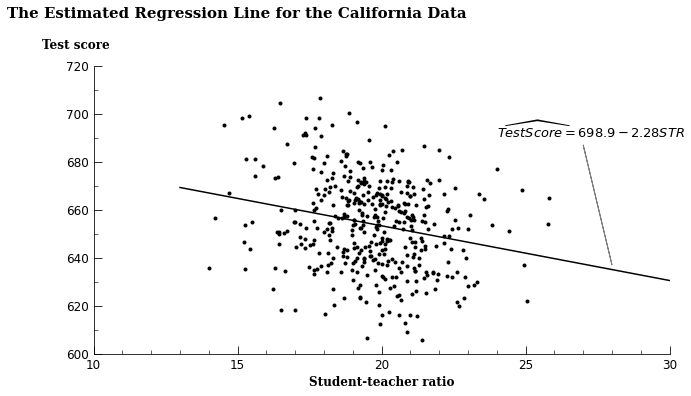

In [20]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_axes([0, 0, 1, 1])
ax.scatter("stratio", "score", data=df, color='black', marker='.')
ax.set_ylim(600, 720)
ax.set_xlim(10, 30)
ax.set_xlabel('Student-teacher ratio', fontsize='large', fontfamily='serif', fontweight='bold')
ax.text(8.2,727,'Test score', fontsize='large', fontfamily='serif', ma='center', fontweight='bold')


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(10))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='x', which="minor", direction='in', length=4, labelsize=12)

ax.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)


m = reg.intercept_
b = reg.coef_
x = np.arange(13,30,0.01).reshape(-1,1)

ax.plot(x, m+(b*x), color='black')

ax.text(7, 740, 'The Estimated Regression Line for the California Data', fontsize=15, fontfamily='serif', ma='center', fontweight='bold')


ax.arrow(28, 637, -1, 50, alpha=0.5)
ax.text(24, 690, r'$\widehat{TestScore}=698.9-2.28STR$', fontsize=13)

#ax.arrow(-0.33, 0.28, 0.05, 0.66, alpha=0.5)
#ax.text(-0.29, 0.97, r'$\widehat{FatalityRate_{1988} - FatalityRate_{1982}}=-0.072-1.04(BeerTax_{1988} - BeerTax_{1982})$')



plt.show()

## 5.4 Heteroskedasticity and Homoskedasticity

Our only assumption about the distribution of $u_i$ conditional on $X_i$ is that it has a mean of zero (the first least squares assumption). If, furthermore, the variance of this conditional distribution does not depend on $X_i$, then the errors are said to be homoskedastic. This section discusses homoskedasticity, its theoretical implications, the simplified formulas for the standard errors of the OLS estimators that arise if the errors are homoskedastic, and the risks you run if you use these simplified formulas in practice. 

The error term, $u_i$ is **homoskedastic** if the variance of the conditional distribution of $u_i$ given $X_i$ is constant for i = 1,....,n and in particular does not depend on $X_i$. Otherwise, the error term is **Heteroskedastic**. 

# Chapter 6: Linear Regression with Multiple Regressors

This chapter explains this "omitted variable bias" and introduces multiple regression, a method that can eliminate omitted variable bias. The key idea of multiple regression is that if we have data on these omitted variables, then we can include them as additional regressors and thereby estimate the effect of one regressor (the student-teacher ratio) while holding constant the other variables (such as student characteristics). 

By focusing only on the student-teacher ratio, the empirical analysis in Chapters 4 and 5 ignored some potentially important determinants of test scores by collecting their influences in the regression error term. These omitted factors include school characteristics, such as teacher quality and computer usage, and student characteristics, such as family background. We begin by considering an omitted students characteristics that is particularly relevant in California because of its large immigrant population: the prevalence in the school district of students who are still learning English. 

Students who are still learning English might perform worse on standardized tests than native English speakers. If districts with large classes also have many students still learning English, then the OLS regression of test scores on the student-teacher ratio could erroneously find a correlation and produce a large estimated coefficient, when in fact the true causal effect of cutting class sizes on test scores is small, even zero. 

In [21]:
df

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,score,stratio
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,690.799988,17.889909
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,661.200012,21.524664
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,643.600006,18.697225
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,647.700012,17.357143
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,640.850006,18.671329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,68957,Las Lomitas Elementary,San Mateo,KK-08,984,59.730000,0.101600,3.556900,195,7290.338867,28.716999,5.995935,700.900024,707.700012,704.300018,16.474134
416,69518,Los Altos Elementary,Santa Clara,KK-08,3724,208.479996,1.074100,1.503800,721,5741.462891,41.734108,4.726101,704.000000,709.500000,706.750000,17.862625
417,72611,Somis Union Elementary,Ventura,KK-08,441,20.150000,3.563500,37.193802,45,4402.831543,23.733000,24.263039,648.299988,641.700012,645.000000,21.885856
418,72744,Plumas Elementary,Yuba,KK-08,101,5.000000,11.881200,59.405899,14,4776.336426,9.952000,2.970297,667.900024,676.500000,672.200012,20.200000


A look at the California data lends credence to this concern. The correlation between the student-teacher ratio and the percentage of English learners (students who are not native English speakers and who have not yet mastered English) in the district is 0.19. This small but positive correlation suggests that districts with more English learners tend to have a higher student-teacher ratio (larger classes). 

Because the student-teacher ratio and the percentage of English learners are correlated, it is possible that the OLS coefficient in the regression of test scores on the student-teacher ratio reflects taht influence.

In [22]:
df.corr()

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,score,stratio
district,1.000000,-0.033569,-0.031524,-0.161727,-0.108032,-0.020999,0.049172,0.103910,-0.026967,0.106576,0.117713,0.114170,-0.058951
students,-0.033569,1.000000,0.997116,0.090161,0.129234,0.928882,-0.112285,0.028392,0.354879,-0.188399,-0.110889,-0.153987,0.298481
teachers,-0.031524,0.997116,1.000000,0.092645,0.124296,0.937242,-0.095195,0.043007,0.351421,-0.179109,-0.102296,-0.144857,0.264641
calworks,-0.161727,0.090161,0.092645,1.000000,0.739422,0.059160,0.067889,-0.512651,0.319576,-0.611847,-0.617691,-0.626853,0.018276
lunch,-0.108032,0.129234,0.124296,0.739422,1.000000,0.061386,-0.061039,-0.684440,0.653061,-0.878808,-0.823015,-0.868772,0.135203
computer,-0.020999,0.928882,0.937242,0.059160,0.061386,1.000000,-0.071311,0.094343,0.291339,-0.109005,-0.032950,-0.073736,0.233826
expenditure,0.049172,-0.112285,-0.095195,0.067889,-0.061039,-0.071311,1.000000,0.314484,-0.071396,0.217927,0.154989,0.191273,-0.619982
income,0.103910,0.028392,0.043007,-0.512651,-0.684440,0.094343,0.314484,1.000000,-0.307419,0.697819,0.699398,0.712431,-0.232194
english,-0.026967,0.354879,0.351421,0.319576,0.653061,0.291339,-0.071396,-0.307419,1.000000,-0.690286,-0.568682,-0.644124,0.187642
read,0.106576,-0.188399,-0.179109,-0.611847,-0.878808,-0.109005,0.217927,0.697819,-0.690286,1.000000,0.922901,0.981882,-0.246593


### I just want to check something really quickly 

In [23]:
pract_df = df.copy()

In [24]:
testscore = np.array(pract_df['score']).reshape(-1,1)
english = np.array(pract_df['english']).reshape(-1,1)
stratio = np.array(pract_df['stratio']).reshape(-1,1)

In [25]:
biased_reg = LinearRegression().fit(stratio, testscore)

In [26]:
b0 = biased_reg.intercept_
b1 = biased_reg.coef_

In [27]:
print(b0)
print(b1)

[698.93294928]
[[-2.27980814]]


$\widehat{testscore} = 698.93 - 2.28 * stratio + U$

In [28]:
pract_df['U'] = testscore - b0 - b1*stratio

In [29]:
pract_df['U'].mean()

-2.382009933214812e-14

In [30]:
U = np.array(pract_df['U']).reshape(-1,1)

In [31]:
reg_eng_U = LinearRegression().fit(english, U)

In [32]:
c0 = reg_eng_U.intercept_
c1 = reg_eng_U.coef_

In [33]:
print(c0)
print(c1)

[9.88503142]
[[-0.62689841]]


In [34]:
pract_df['e'] = U - c0 - c1*english

The error term within the error term got smaller. Good

In [35]:
pract_df['e'].mean()

-2.7068294695622863e-15

In [36]:
reg_str_eng = LinearRegression().fit(stratio, english)

In [37]:
d0 = reg_str_eng.intercept_
d1 = reg_str_eng.coef_

In [38]:
print(d0)
print(d1)

[-19.85405468]
[[1.81371886]]


#### Unbiased regression

In [39]:
X = df[['stratio', 'english']]

In [40]:
unbiased_reg = LinearRegression().fit(X, testscore)

In [41]:
beta_0 = unbiased_reg.intercept_
beta_1 = unbiased_reg.coef_

In [42]:
print(beta_0)
print(beta_1)

[686.03224454]
[[-1.10129565 -0.64977683]]


In [43]:
beta_1[0][0] + (beta_1[0][1] * d1)

array([[-2.27980814]])

## Addressing Omitted Variable Bias by Dividing the Data into Groups

What can you do about omitted variable bias? Our superintendent is considering increasing the number of teachers in her district, but she has no control over the fraction of immigrants in her community. As a result, she is interested in the effect of the student-teacher ratio on test scores, holding constant other factors, including the percentage of English learners. This new way of posing her question suggests that, instead of using data for all districts, perhaps we should focus on districts with percentages of English learners comparable to hers. Among this subset of districts, do those with smaller classes do better on standardized tests? 

WELL -- the conclusion is that this way of doing it doesn't solve the problem.

# 6.2 The Multiple Regression Model 

The multiple regrssion model extends the single variable regression model of Chapters 4 and 5 to inlcude additional variables as regressors. This model permits estimating the effect on $Y_i$ of changing one variable ($X_{1i}$) while holding the other regressors ($X_{2i}, X_{3i}$ and so forth) constant. 

The interpretation of the coefficient $\beta_1$ in Equation (6.2) is different than it was when $X_{1i}$ was the only regressor: In Equation (6.2), $\beta_1$ is the effect on Y of a unit change in $X_1$, holding $X_2$ constant or controlling for $X_2$.

Another phrase used to describe $\beta_1$ is the partial effect on Y of $X_1$, holding $X_2$ fixed.

### Application to Test Scores and the Student-Teacher Ratio

In [44]:
df.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,score,stratio
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,690.799988,17.889909
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,661.200012,21.524664
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,643.600006,18.697225
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,647.700012,17.357143
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,640.850006,18.671329


In [45]:
X = df[["stratio", 'english']]
y = df["score"]

In [46]:
mult_reg = LinearRegression().fit(X, y)

In [47]:
mult_reg.intercept_

686.0322445391488

In [48]:
mult_reg.coef_

array([-1.10129565, -0.64977683])

$\widehat{TestScore} = 686 - 1.10 (STR) - 0.65(English)$

# Chapter 7: Hypothesis Tests and Confidence Intervals in Multiple Regression

## 7.5 Model Specification for Multiple Regression

The job of determining which variables to include in multiple regression - that is, the problem of choosing specification - can be quite challenging, and no single rule applies in all situations. But do not despair, because some useful guidlines are available. 

The starting point for choosing a regression specification is thinking through the possible sources of omitted variable bias. It is important to rely on your expert knowledge of the empirical problem and to focus on obtaining an unbiased estimate of the causal effect of interest; do not rely solely on purely statistical measures of fit such as the $R^2$ or $\bar{R^2}$. 

#### Omitted Variable Bias in Multiple Regression

....

#### The Role of Control Variables in Multiple Regression

A **control variable** is not the object of interest in the study; rather it is a regressor included to hold constant factors that, if neglected, could lead the estimated causal effect of interest to suffer from omitted variable bias. 

In this subsection, we introduce an alternative to the first least squares assumption in which the distinction between a variable of interest and a control variable is explicit. If this alternative assumption holds, the OLS estimator of the effect of interest is unbiased, but the OLS coefficients on control variables are in general biased and do not have a causal interpretation.

#### Model Specification in Theory and in Practice

Our approach to the challenge of potential omitted variable bias is twofold. First, a core or base set of regressors should be chosen using a combination of expert judgement, economic theory, and knowledge of how the data were collected; the regression using this base set of regressors is sometimes referred to as a **base specification**. This base specification should contain the variable of primary interest and the control variables suggested by expert judgement and economic theory. 

Expert judgment and economic theory are rarely decisive, however, and often the variables suggested by economic theory are rarely decisive, however, and often the variables suggested by economic theory are not the ones on which you have data. Tehrefore the next step is to develop a list of candidate **alternative specifications,** that is, alternative set of regressors. If the estimates of the coefficients of interest are numerically similar across the alternative specifications, then this provides evidence that the estimates from your base specification are reliable. If, on the other hand, the estimates of the coefficients of interest change substantially across specifications, this often provides evidence that the original specification had omitted variable bias. We elaborate on this approach to model specification in Section 9.2 after studying some tools for specifying regressions. 